<a href="https://colab.research.google.com/github/prog815/abscur/blob/master/%D0%98%D0%B7%D0%B2%D0%BB%D0%B5%D1%87%D0%B5%D0%BD%D0%B8%D0%B5_%D0%BB%D1%83%D1%87%D1%88%D0%B5%D0%B3%D0%BE_%D0%B8%D0%B7_%D0%BC%D0%BE%D0%B4%D0%B5%D0%BB%D0%B8_%D0%B3%D0%B5%D0%BD%D0%B5%D1%82%D0%B8%D0%BA%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Извлечение лучшего из модели генетики

**Проект "Абсолютный курс"**

А.В. Енин

г. Оренбург

08.08.2020

Сайт - http://www.abscur.ru

Twitter - https://twitter.com/abscurs

ВКонтакте - https://vk.com/abscur

Одноклассники - https://ok.ru/group/53547043520717

FB - https://www.facebook.com/abscur

Telegram - https://t.me/AbsCur

GitHub - https://github.com/prog815/abscur

WhatsUp - https://chat.whatsapp.com/KrNJXAKizPxDlDSjYfdpQs

Viber - https://invite.viber.com/?g2=AQB63y7Cm%2BNJK0tNZW%2F9kI00M6Wr8HuZ7XeamzN4jZCve8Aq9%2FiD3DY56Eqcf7dc

YouTube - https://www.youtube.com/playlist?list=PLG1V24vhSKo6MamGtgm2oTkDZHeHBHNFW

# Описание

Извлекаем в классе генетики лучшие параметры. 

Лучшие параметры можно взять несколькимим способами:
- По популяции брать среднее
- По популяции средний квантиль

# Загружаем библиотеку

In [4]:
! pip install git+https://github.com/prog815/abscur
from abscur.optim import ListGenetic

  Cloning https://github.com/prog815/abscur to /tmp/pip-req-build-sjxyi9qv
  Running command git clone -q https://github.com/prog815/abscur /tmp/pip-req-build-sjxyi9qv
  Created wheel for abscur: filename=abscur-0.1.29-cp36-none-any.whl size=10579 sha256=8cac1935a73940de86676850c8ad7036900683ad2733d5f14dc69d2c17a227a1
  Stored in directory: /tmp/pip-ephem-wheel-cache-_6v4_b_l/wheels/57/99/b6/8f8d84361b37a8789f91280c8e92720b9101beffb944cd32ab
Successfully built abscur


In [5]:
m = ListGenetic(3,x=[0,1,2],y=[-1,3,8])
m.getBestParams()

{'x': 1, 'y': 3}

# Определяем данные по линейной функции

In [6]:
import numpy as np

N = 1000

X = np.random.randn(N)
Y = np.random.randn(N)

A = 2
B = 4
C = 6

Z = A*X+B*Y+C

Z += np.random.randn(N)*0.1

# Запускаем генетический поиск

## функция оптимизации

In [7]:
def getQualityMethod(a,b,c):
    z = a*X+b*Y+c
    return -np.sum(np.abs(Z-z))

## создание модели генетического поиска

In [8]:
modelGA = ListGenetic(pop_size=20,
                        a=np.arange(-10,10),
                        b=np.arange(-10,10),
                        c=np.arange(-10,10),
                        quality_method=getQualityMethod)

## запуск генетического поиска

In [9]:
modelGA.fit(1000)


1 {'quality': -7079.5230361791, 'a': 9, 'b': 9, 'c': 3}
2 {'quality': -11358.153150641758, 'a': 3, 'b': -9, 'c': 0}
3 {'quality': -8763.778947036717, 'a': 8, 'b': -5, 'c': 3}
4 {'quality': -7863.924828998055, 'a': -7, 'b': 6, 'c': 3}
5 {'quality': -2340.356005080589, 'a': 4, 'b': 6, 'c': 5}
6 {'quality': -6729.426349898119, 'a': 9, 'b': 9, 'c': 5}
7 {'quality': -6579.113156982279, 'a': 3, 'b': 9, 'c': 0}
8 {'quality': -7172.470999541947, 'a': 3, 'b': -5, 'c': 5}
9 {'quality': -6507.991839062166, 'a': 8, 'b': 9, 'c': 3}
10 {'quality': -4128.778155570961, 'a': 3, 'b': 9, 'c': 5}
11 {'quality': -9894.229215177802, 'a': -7, 'b': 9, 'c': 0}
12 {'quality': -5693.617711371504, 'a': 9, 'b': 5, 'c': 4}
13 {'quality': -6270.922097099676, 'a': 8, 'b': 9, 'c': 4}
14 {'quality': -4753.276276921111, 'a': 3, 'b': 9, 'c': 3}
15 {'quality': -2354.486766091947, 'a': 2, 'b': 6, 'c': 4}
16 {'quality': -2721.2033984335376, 'a': 4, 'b': 6, 'c': 4}
17 {'quality': -2051.444101830556, 'a': 3, 'b': 5, 'c': 4}
1

## выводим результаты на графиках

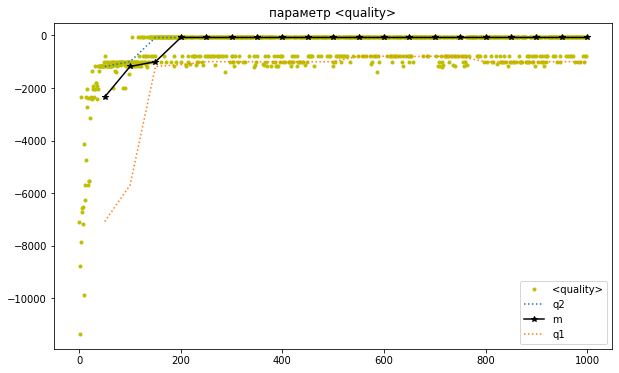

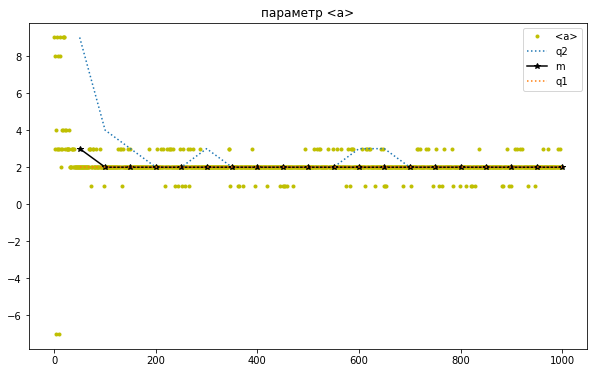

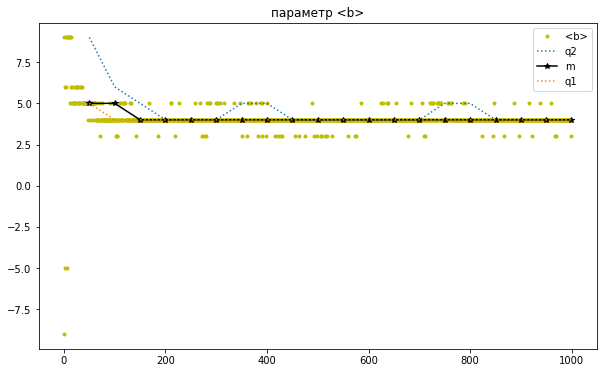

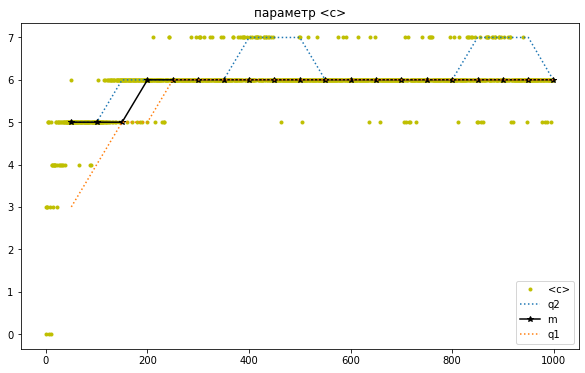

In [10]:
modelGA.plot_hist_new(('quality','a','b','c'))

# Выводим лучших

In [11]:
modelGA.getBestParams()

{'a': 2, 'b': 4, 'c': 6}